## 2. Models of Single Spiking Neurons

This notebook is part of a larger effort to offer an approachable introduction to models of the mind and the brain for the course “Foundations of Neural and Cognitive Modelling”, offered at the University of Amsterdam by [Jelle (aka Willem) Zuidema](https://staff.fnwi.uva.nl/w.zuidema/). The notebook in this present form is the result of the combined work of Iris Proff, [Marianne de Heer Kloots](http://mdhk.net/), and [Simone Astarita](https://www.linkedin.com/in/simone-astarita-4499b11b5/).

### Instructions

The following instructions apply if and only if you are a student taking the course “Foundations of Neural and Cognitive Modelling” at the University of Amsterdam (Semester 1, Period 2, Year 2022).

Submit your solutions on Canvas by Tuesday 15th November 18:00. Please hand in the following:
- A copy of this notebook with the **code** and results of running the code filled in the required sections. The sections to complete all start as follows:

<code>### YOUR CODE HERE ###</code>

- A separate pdf file with the answers to the **homework exercises**. These can be identified by the following formatting, where **n** is the number of points (out of 10) that question **m** is worth:
<br>

>***Homework exercise m***: question(s) **(npt)**.

### Introduction
In the previous computer lab we learned how to use Python to plot phase portraits as well as draw nullclines and trajectories of a 2-dimensional system of linear ODEs. Today we will use the same techniques to study the behaviour of two models of single neuron dynamics: the Fitzhugh-Nagumo model and the Izhikevich model. We will re-use some of the code from the previous computer lab.

### 1. The Fitzhugh-Nagumo model 
The Fitzhugh-Nagumo model describes the neuronal dynamics with the following two
ODEs, where $v$ refers to the membrane potential, $r$ is a recovery or feedback variable, $I$
is the strength of the input current and $a$, $b$ and $c$ are constant parameters:

$$
\begin{align*}
    \frac{dv}{dt} &= f(v, r) = c(v-\frac{1}{3}v^3 + r + I) \\
    \frac{dr}{dt} &= g(v, r) = -\frac{1}{c}(v - a + br)
\end{align*}
$$

Note that, for the Fitzhugh-Nagumo model as it is presented here, the sign of the
membrane potential is opposite to what you would expect in a biological neuron. That
means, actions potentials are modeled as negative, rather than positive, deflections.

In order to understand these equations better, you can check what the equations of change of $v$ and $r$ produce for some of the extreme values ($-\infty$,$0$,$\infty$) of these variables. I.e., what do you get when both $v$ and $r$ are $0$? What when $v$ is very large but $r=0$?

We will use a function called <code>dvdr</code> that takes an $v$-value, a $r$-value and a vector $(a, b, c, I)$ containing both the parameters of the system and its input. The function returns a vector with $\frac{dv}{dt}$ and $\frac{dr}{dt}$.

In [1]:
import matplotlib.pyplot as plt    # package for plotting
import numpy as np                 # package for basic algebra
from scipy.integrate import odeint # package to solve ODEs

def dvdr(v,r,param):
    dv = param[2]*(v - 1./3. * v**3 + r + param[3])
    dr = (-1./param[2]) * (v - param[0] + param[1]*r)
    return np.array([dv,dr])

Now we can check our intuitions above using the function <code>dvdr</code>. Use e.g., $1000$ rather than $\infty$ to represent “very large”.

In [2]:
# define parameter vector: these are just examples
a = 0.7; b = 0.8; c = 3; I = 0; param = (a,b,c,I) 

# call newly defined function
dvdr(1000,0,param)

array([-9.99997e+08, -3.33100e+02])

We can also plot the vector field for this dynamical system for a grid of point in its state space.

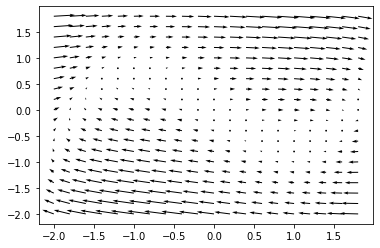

In [3]:
# create v and r vectors
v = np.arange(-2, 2, 0.2)
r = np.arange(-2, 2, 0.2)

# create arrays with all combinations of x and y
v_vals, r_vals = np.meshgrid(v, r)

# generate dv and dr at all points
a = 0.7; b = 0.8; c = 3; I = 0
param = (a,b,c,I) 

# evaluate ODE at all points in our grid
v_dirs = np.empty((len(v_vals),len(v_vals)))
r_dirs = np.empty((len(v_vals),len(v_vals)))

for i in np.arange(0,len(v_vals)):
    for j in np.arange(0,len(v_vals)):
        dirs = dvdr(v_vals[i,j], r_vals[i,j], param)
        v_dirs[i,j] = dirs[0]
        r_dirs[i,j] = dirs[1]

# make vector fields

fig, ax = plt.subplots()
q = ax.quiver(v_vals, r_vals, v_dirs, r_dirs, minlength=2 ) #r: xlocations v: ylocations r_dirs: xdirections v_dirs: ydirections

Can you see where the nullclines are? Which one is the $r$-nullcline, which one the $v$-nullcline? Where (approximately) do they intersect?

The $v$- and $r$-nullclines of the Fitzhugh-Nagumo model are in fact given by:

$$
\begin{align*}
    r(v) &= \frac{1}{3}v^3 - v - I\\
    r(v) & = \frac{a-v}{b}
\end{align*}
$$

> ***Homework exercise 1***: Explain what these two equations describe. Analytically show that the two previous equations indeed describe the nullclines of the system. This is a “pen&paper” exercise: solve it without the use of code. **(2pt)**

Here are two functions <code>v_nullcline</code> and <code>r_nullcline</code> that return the $r$ values of the $v$- and $r$-nullclines when given input $v$ and a parameter vector containing the parameters of the system.

In [4]:
def v_nullcline(v, param):
    r = 1./3. * v**3 - v - param[3]
    return r

def r_nullcline(v, param):
    r = (param[0]-v)/param[1]
    return r

Now we can use these functions to plot the null cline: run the code below to visualize them.

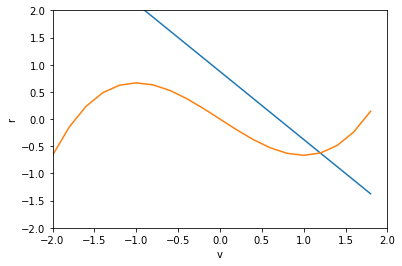

In [5]:
# make and plot nullclines
plt.plot(v,r_nullcline(r,param))
plt.plot(v,v_nullcline(r,param))
plt.ylim((-2,2))
plt.xlim((-2, 2))
plt.xlabel('v')
plt.ylabel('r')

plt.show()

Finally, we can use the <code>odeint</code> function to plot some trajectories.

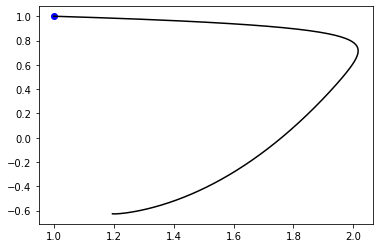

In [6]:
def ode_system(state, t, param):
    v = state [0]
    r = state [1]
    # Here you use our dvdr function
    return (dvdr(v,r, param))

# initial value points
v_init=1
r_init=1
# time points to evaluate
t = np.arange(1,10,0.01)
plt.plot(v_init,r_init,'bo')

state = np.array([v_init, r_init]);
trajectory = odeint(ode_system, state, t, args = (param,))
plt.plot(trajectory[:,0],trajectory[:,1],'k')
        
plt.show()

> Try to plot trajectories for different initial points.

We can automate this for a grid of initial points.

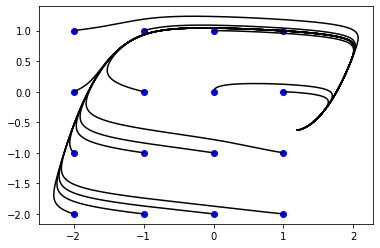

In [7]:
# package to solve ODEs
from scipy.integrate import odeint

# make grid of initial values for trajectories
v_init = np.arange(-2, 2, 1)
r_init = np.arange(-2, 2, 1)
v_grid, r_grid = np.meshgrid(v_init, r_init)
plt.plot(v_grid,r_grid,'bo')

# time points to evaluate
t = np.arange(1,10,0.01)

# compute trajectories for each point on grid
for i in np.arange(0,len(v_init)):
    for j in np.arange(0,len(r_init)):
        state = np.array([v_init[i], r_init[j]]);
        trajectory = odeint(ode_system, state, t, args = (param,))
        plt.plot(trajectory[:,0],trajectory[:,1],'k')
        

plt.show()

We can now use our functions to study the behaviour of the system, like we did last time. That means we want to visualise the phase plot with nullclines and some trajectories. It should be fairly easy to copy-paste the code from above and put it all together. You can also look at the previous lab to rembeber how we plotted the behaviour of the new system then. The steps we need are:

* Create vectors with $v$ and $r$ values. We used $x$ and $y$ as names in the previous lab, but it doesn’t really matter what you call them in your script as long as you are consistent and clear.

* Use <code>np.meshgrid</code> to create arrays with all possible combinations of $v$ and $r$ values.

* Use your function <code>dvdr</code> to generate the $\frac{dv}{dt}$ and $\frac{dr}{dt}$ at all previously defined points and put them in a vector.

* Use <code>ax.quiver</code> to create the vector fields (use <code>fig, ax = plt.subplots()</code> before).

* Generate a (fine grained) sequence of $v$-values to plot your nullclines, fill vectors with the $r$ values on these values.

* Plot the nullclines.

* Make a vector of time values and a grid of $v$- and $r$-values corresponding to starting points for the trajectories.

* Plot the trajectories for each starting point using <code>odeint()</code>. That function takes a function <code>ode_system</code> as an input.

> Draw the phase plane of the Fitzhugh-Nagumo model with $a = 0.7, b = 0.8, c = 3$ and set the injected current $I$ to $0$. The equilibrium point for these parameters is $(1.1994, −0.62426)$: we plot it so that you can check that your graph looks correct.

In [ ]:
### YOUR CODE HERE ###

# create v and r vectors

# create arrays with all combinations of x and y

# generate dv and dr at all points

# evaluate ODE at all points in our grid

# make vector field

# compute and plot nullclines

# make grid of initial values for trajectories

# time points to evaluate

# compute trajectories for each point on grid

# mark equilibrium
plt.plot(1.1994,-0.62426,'ro')

plt.show()

When no pertubations are made to the system, it will stay in its equilibrium, as both $\frac{dv}{dt}$ and $\frac{dr}{dt}$ are equal to $0$. Briefly interjecting a current $I$ into the system will move it a little bit in the state space (look at the differential equations to understand how). We do not explicitly model a current as this would be require more coding. If you change the value for $I$ instead, you will mimic a constant, not a brief input, and this will also shift the equilibrium point. We can instead  manually set the starting point of the trajectory to different points in the state space and observe what happens.

<br>

> ***Homework exercise 2***: What happens when the neuron is depolarized from its equilibrium value? In other words, explain what happens to the trajectories in the phase portait you created above. Does the system get back to the equilibrium? Do you get different types of behaviour depending on how much you perturbate the system? Make plots of the corresponding trajectories to illustrate this. How would you describe the path back to the equilibrium? **(2pt)**

> ***Homework exercise 3***: Plot the value of $v$ on different trajectories in the state space (i.e. starting at different states $(v,r)$) against the time $t$: that is, plot $v(t)$. Does this plot remind you of something? **(2pt)**
> 
> Hint: you can use the output of the function <code>odeint</code> to create a plot of $v$ versus $t$. <code>odeint</code> gives as output a matrix <code>trajectories</code> with the $v$-values in the first column and the $r$-values in the second column.

In [ ]:
### YOUR CODE HERE ###

# the t (time) range of values
t =

# STATE 1
# the intial state
state1 = 
# the trajectory using state1
trajectory1 = 
# plot it
plt.plot(t,trajectory[:,0])

# repeat the above for different initial states

###

plt.xlabel('time')
plt.ylabel('membrane potential')
plt.title('different trajectories in state space')
# you can use plt.legend to add a name for each initial state
# example with three different states
# plt.legend(['state 1','state 2','state 3'])
plt.show()

> ***Homework exercise 4***: Whether the nullclines cross on the left or on the right of the top of the curves determines the stability of the equilibrium. Can you change the parameters such that a qualitive change of the system occurs (i.e., a bifurcation) and the equilibrium is not stable anymore? What kind of equilibrium do we have in this case? **(2pt)**

In [ ]:
### YOUR CODE HERE ###

# define a new paramater vectors

# then re-use the code you completed for exercise 3

### 2. The Izhikevich model 
The Izhikevich model is described by the following system of two ODEs:

$$
\begin{align*}
    \frac{dv}{dt} &= f(v,u) = 0.04v^2 + 5v + 140 - u + I \\
    \frac{du}{dt} &= g(v,u) = a(bv - u)
\end{align*}
$$

with the reset condition: $\text{if } v \ge 30 \text{ then } v \leftarrow c;\;\; u \leftarrow u+d$. The model is discontinous at the reset point - this way Izhikevich avoids having to explicitly model how the system gets back to the equilibrium point. Therefore, we cannot use the <code>odeint</code> to compute trajectories, but we need to do it point by point using the for loop. Check out the code under the comment *compute trajectories* below if you are interested how it can be done.

The nullclines of the Izhikevich neuron are given by:

$$
\begin{align*}
    u(v) &= 0.04v^2 + 5v + 14 + I\\
    u(v) &= bv
\end{align*}
$$

Both the <code>dvdu</code> function and the nullcline functions are already implemented in the code below, you can just use them as they are.

> ***Homework exercise 5***: The Izhikevich neuron model can, depending on the parameters, exhibit several types of spiking behaviour, such as (1) regular spiking, (2) fast spiking or (3) intrinsically bursting behaviour. Find parameter sets that lead to these three different types of behaviour (look at http://www.izhikevich.org/publications/spikes.htm for help) and see if you can understand why they behave this way by plotting their trajectories. Hand in the phase portraints and $v(t)$-plots of the three different neuron types to show that they indeed exhibit the desired behaviour. Izhikevich assumes a constant input current of $I=10$. **(2pt)**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### set the parameters/initialise values
v_init = -65; u_init = -18 # these are the initial values of the trajectory
times = 2000; dt = 0.1;

### YOUR CODE HERE ###
# set values for parameters (a, b and c and d)
# choose different ones to see all behaviours
a = ; b = ; c = ; d = ; I = 10

###

params = np.array ([a,b,c,d,I])

vmin = -80; vmax = 40 ;vstep = 5        # set min, max and stepsize for v
umin = -30; umax = 30; ustep = 2.5      # set min, max and stepsize for u

# create v and r values
v = np.arange(vmin, vmax, vstep)            # create v values
u = np.arange(umin, umax, ustep)            # create u values
v_vals, u_vals = np.meshgrid(v, u)

### ODE definition
def dvdu(v,u,param):
    a = params[0]; b = params[1]; c = params[2]; d = params[3]; I = params[4]
    dv = 0.04 * v**2 + 5*v + 140 - u + I
    du = a * (b*v - u)
    
    if v >= 30: # reset condition
        dv = v + c
        du = d
        
    return np.array([dv,du])

### nullcline functions
def v_nullcline(v, param):
    I = param[4]
    return 0.04*v**2 + 5*v + 140 + I

def u_nullcline(v, param):
    b = param[1]
    return b*v

# evaluate ODE at all points in our grid
v_dirs = np.empty((len(v_vals),len(v_vals)))
u_dirs = np.empty((len(v_vals),len(v_vals)))
vnorm = np.empty((len(v_vals),len(v_vals)))
unorm = np.empty((len(v_vals),len(v_vals)))
for i in np.arange(0,len(v_vals)):
    for j in np.arange(0,len(v_vals)):
        dirs = dvdu(v_vals[i,j], u_vals[i,j], params)
        v_dirs[i,j] = dirs[0]
        u_dirs[i,j] = dirs[1]
        # compute normalized arrows (all of the same length) to make display more neat
        vnorm[i,j]= v_dirs[i,j] / np.sqrt(u_dirs[i,j]**2 + v_dirs[i,j]**2)
        unorm[i,j] = u_dirs[i,j] / np.sqrt(u_dirs[i,j]**2 + v_dirs[i,j]**2)

fig, ax = plt.subplots()
q = ax.quiver(v, u, vnorm, unorm,minlength = 2) #v: xlocations u: ylocations r_dirs: xdirections v_dirs: ydirections 
#q = ax.quiver(v, u, v_dirs, u_dirs,minlength = 2)

# generate data to plot nullclines
v = np.arange (vmin, vmax, vstep/10)    # create v-values, use vmin and vmax from before
v_nc = v_nullcline(v, params)            # generate y values for v-nullcline
u_nc = u_nullcline(v, params)            # generate r values for r-nullcline
 
# plot nullclines
plt.plot(v, v_nc)
plt.plot(v, u_nc)

# plot reset threshold
plt.plot(np.array([30, 30]), np.array([umin-2, umax+2]))
plt.ylim((-30,30))
plt.xlim((-80, 40))

#### compute trajectories ###

# allocate space
v_traj = np.zeros(times); u_traj = np.zeros(times)
v_traj[0]=v_init; u_traj[0]=u_init

# compute trajectories point by point
for t in range(0,times-1,1):
    if v_traj[t] < 30: # update according to ODE using the dvdu function
        [dv,du]=dvdu(v_traj[t],u_traj[t],params)
        v_traj[t+1] = v_traj[t]+ dv*dt
        u_traj[t+1] = u_traj[t] + dt*du
    else: # update according to reset condition
        v_traj[t] = 30
        v_traj[t+1] = c
        u_traj[t+1] = u_traj[t] + d

# plot trajectory
plt.plot(v_init, u_init, 'ro')        
plt.plot(v_traj,u_traj)
plt.ylim((-30,30))
plt.xlim((-80, 40))
plt.show()

#plot v-values against time
plt.plot(np.arange(0,times),v_traj)
plt.show()